This notebook is used for the creation and testing of the DataModules used for training the models

In [1]:
import os
import torchvision
import matplotlib.pyplot as plt

os.chdir("..")

In [2]:
from src.data.covidx import COVIDXDataModule

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((448, 448), antialias=True),
    ]
)

data = COVIDXDataModule(
    path="data/raw/COVIDX-CXR4",
    transform=transform,
    batch_size=16,
    train_shuffle=True,
).setup()

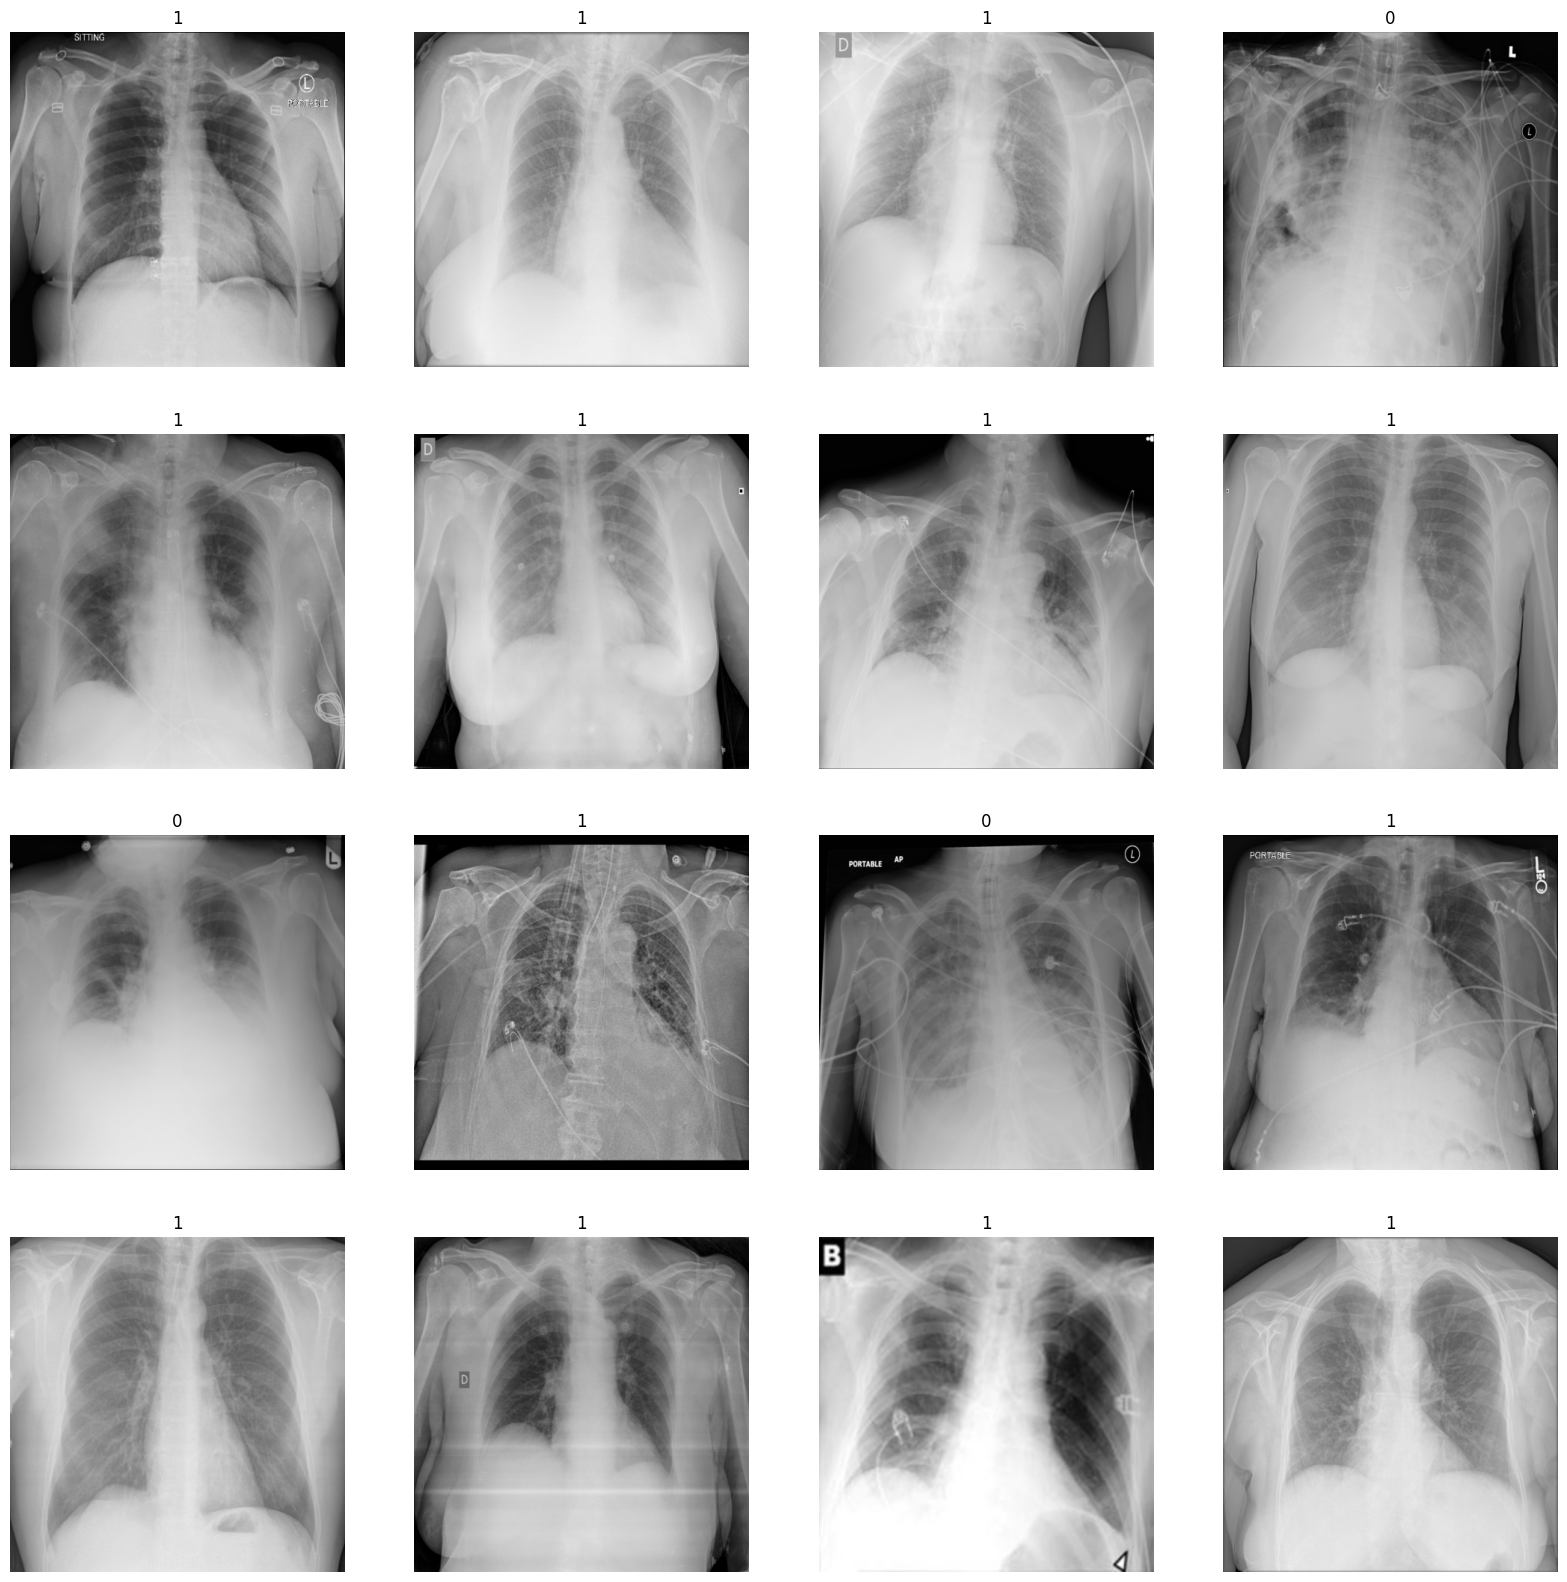

In [3]:
for batch in data.train_dataloader():
    image, label = batch
    plt.figure(figsize=(20, 20))
    for i in range(image.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(image[i].permute(1, 2, 0).clip(0, 1), cmap="gray")
        plt.axis("off")
        plt.title(label[i].item())
    break

---


In [4]:
from src.data.mri import MRIDataModule

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((448, 448), antialias=True),
    ]
)

data = MRIDataModule(
    path="data/raw/Brain-Tumor-MRI",
    path_processed="data/processed/Brain-Tumor-MRI",
    transform=transform,
    batch_size=16,
    train_shuffle=True,
).setup()

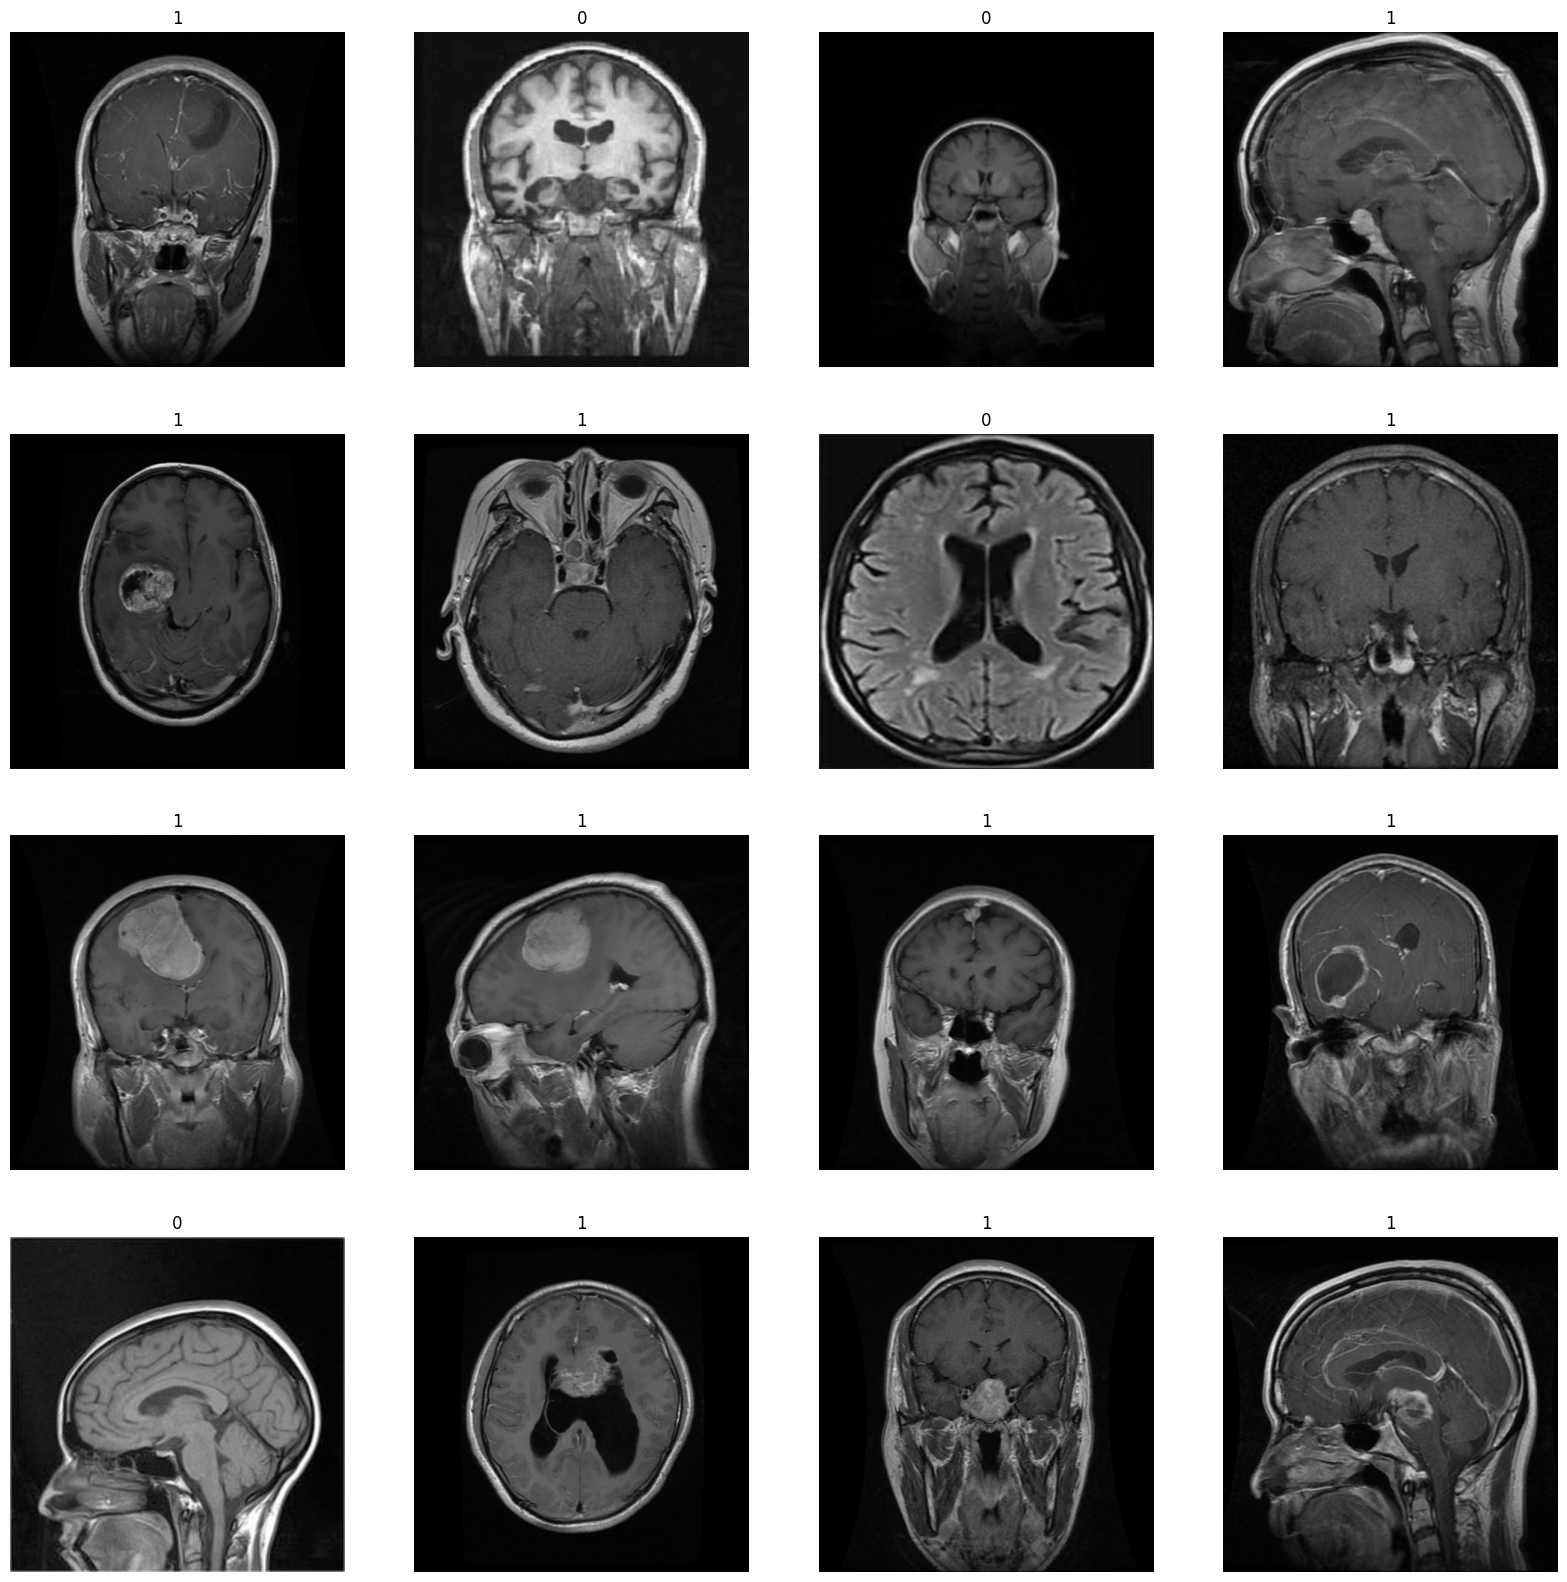

In [5]:
for batch in data.train_dataloader():
    image, label = batch
    plt.figure(figsize=(20, 20))
    for i in range(image.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(image[i].permute(1, 2, 0).clip(0, 1), cmap="gray")
        plt.axis("off")
        plt.title(label[i].item())
    break